## Multiple Linear Regression

In [13]:
import sys
!{sys.executable} -m pip install plotly -q


In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
X,y=make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [16]:
df=pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})

In [17]:
df.head()

,feature1,feature2,target
0,1.082499,1.405289,74.607979
1,0.287294,-0.405344,-49.283479
2,1.139659,1.026750,59.964212
3,0.652248,0.448965,-15.734566
4,1.321028,-1.313180,36.508457


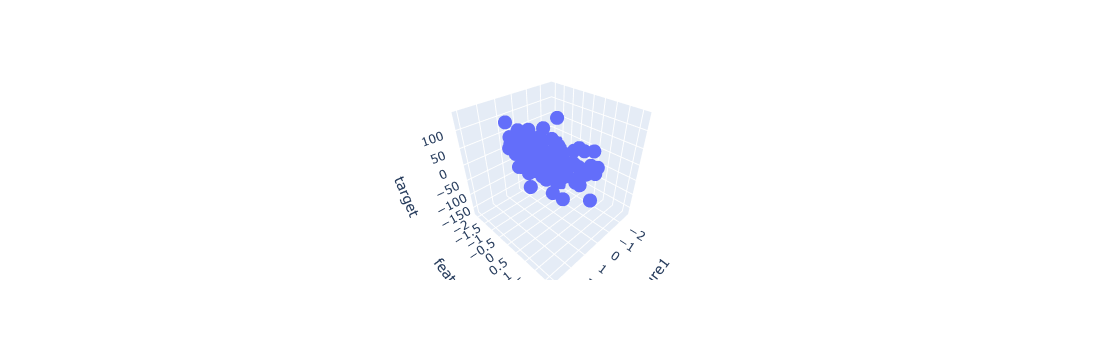

In [18]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=3)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_pred=lr.predict(X_test)
y_pred

array([ 27.45022589,   8.10672067,   8.81453938, -41.73553382,
        -8.64366486,  28.30635623,  25.10791722,  52.03264843,
       -19.85053623,  27.51823761, -51.38826353,  33.89214259,
       -79.97205546, -34.40429877, -33.20041129,  46.83312046,
         0.85387643, -88.26276492, -18.27077529,  47.18211869])

In [30]:
y_test

array([  63.43697988,   52.77776124,   -4.15441638,  -15.36605256,
         11.25506132,   40.13023077,    9.27976118,   83.99345165,
       -134.69084851,  -19.88085593,  -45.83735913,   86.46293474,
        -25.00050442,  -39.70193223,  -88.69348993,   19.56572803,
         76.78547637,  -88.44228221,  -61.46237383,  121.91608879])

In [31]:
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('R2_score:',r2_score(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE : 37.84676176870653
MSE : 2214.0299980914965
R2_score: 0.4897082645771267
RMSE : 47.05348019107085


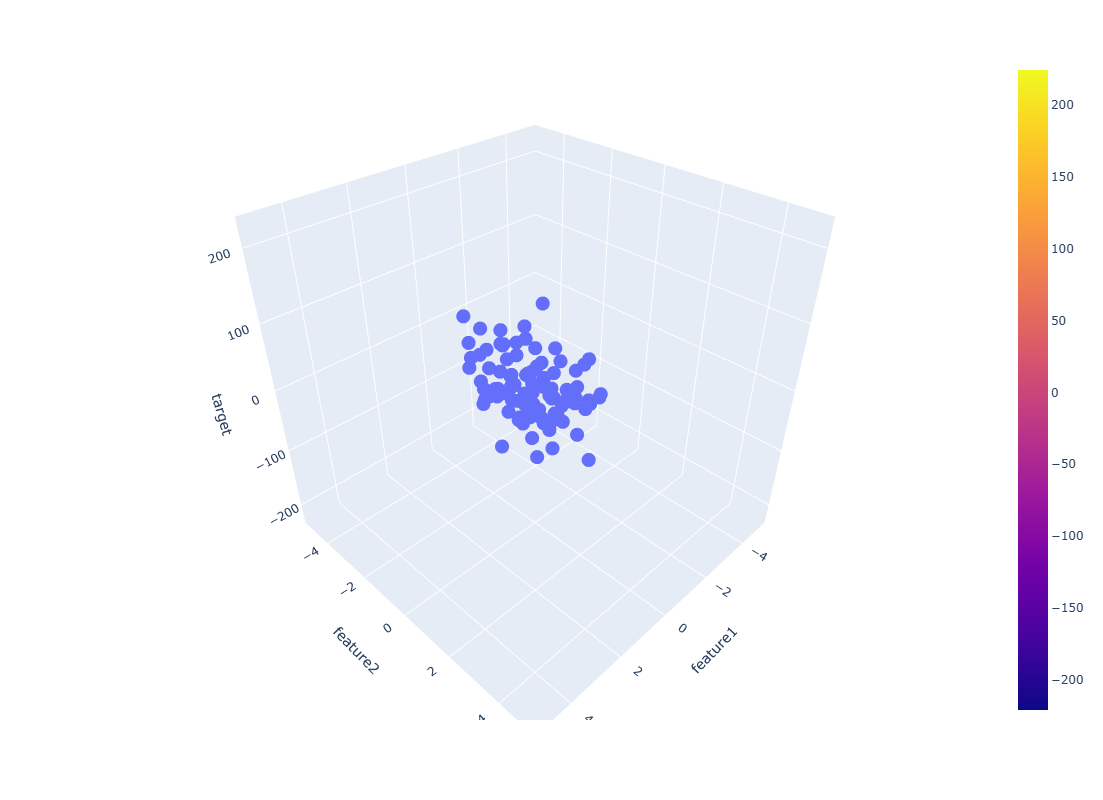

In [38]:
# Grid create
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(x, y)

# 👉 final pehle banao
final = np.vstack((
    xGrid.ravel(),
    yGrid.ravel()
)).T   # shape = (100, 2)

# Prediction
z_final = lr.predict(final).reshape(10, 10)
z = z_final

# Scatter plot (original data)
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

# Surface plot (model plane)
fig.add_trace(
    go.Surface(x=x, y=y, z=z)
)

fig.update_layout(
    width=1000,
    height=800
)

fig.show()


In [33]:
lr.coef_
     


array([34.26142185, 10.32982263])

In [34]:
lr.intercept_

np.float64(1.6186029283847851)